In [1]:
#Importing Liabraries
import numpy as np
import pandas as pd


In [2]:
#Importing Database
covid=pd.read_csv('G:/YU - DATA ANALYTICS/Part 5 by Hashmat/Corona NLP.csv',encoding="ISO-8859-1")

In [3]:
covid.head(10)

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   
5         6       44958          Los Angeles  03-03-2020   
6         7       44959                  NaN  03-03-2020   
7         8       44960  Geneva, Switzerland  03-03-2020   
8         9       44961                  NaN  04-03-2020   
9        10       44962      Dublin, Ireland  04-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral  
5  Do you remember the last time you paid $2.99 a...             Neutral  
6  Voting in the age of #coronavirus = hand sanit...            Positive  
7  @DrTedros "We canÂt stop #COVID19 without pro...             Neutral  
8  HI TWITTER! I am a pharmacist. I sell hand san...  Extremely Negative  
9  Anyone been in a supermarket over the last few...  Extremely Positive

In [4]:
covid.shape

(44955, 6)

In [5]:
#Droping the unwanted columns
covid2=covid.drop(columns=['UserName','ScreenName','Location','TweetAt'])

In [6]:
covid2

OriginalTweet           Sentiment
0      TRENDING: New Yorkers encounter empty supermar...  Extremely Negative
1      When I couldn't find hand sanitizer at Fred Me...            Positive
2      Find out how you can protect yourself and love...  Extremely Positive
3      #Panic buying hits #NewYork City as anxious sh...            Negative
4      #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral
...                                                  ...                 ...
44950  Airline pilots offering to stock supermarket s...             Neutral
44951  Response to complaint not provided citing COVI...  Extremely Negative
44952  You know itÂs getting tough when @KameronWild...            Positive
44953  Is it wrong that the smell of hand sanitizer i...             Neutral
44954  @TartiiCat Well new/used Rift S are going for ...            Negative

[44955 rows x 2 columns]

In [7]:
covid

UserName  ScreenName                      Location     TweetAt  \
0             1       44953                           NYC  02-03-2020   
1             2       44954                   Seattle, WA  02-03-2020   
2             3       44955                           NaN  02-03-2020   
3             4       44956                   Chicagoland  02-03-2020   
4             5       44957           Melbourne, Victoria  03-03-2020   
...         ...         ...                           ...         ...   
44950     44951       89903  Wellington City, New Zealand  14-04-2020   
44951     44952       89904                           NaN  14-04-2020   
44952     44953       89905                           NaN  14-04-2020   
44953     44954       89906                           NaN  14-04-2020   
44954     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1      When I couldn't find hand sanitizer at Fred Me...            Positive  
2      Find out how you can protect yourself and love...  Extremely Positive  
3      #Panic buying hits #NewYork City as anxious sh...            Negative  
4      #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral  
...                                                  ...                 ...  
44950  Airline pilots offering to stock supermarket s...             Neutral  
44951  Response to complaint not provided citing COVI...  Extremely Negative  
44952  You know itÂs getting tough when @KameronWild...            Positive  
44953  Is it wrong that the smell of hand sanitizer i...             Neutral  
44954  @TartiiCat Well new/used Rift S are going for ...            Negative  

[44955 rows x 6 columns]

In [10]:
#Renaming the columns to 'text' and 'target'
covid2.rename(columns={'OriginalTweet':'text','Sentiment':'target'},inplace=True)
covid2

text              target
0      TRENDING: New Yorkers encounter empty supermar...  Extremely Negative
1      When I couldn't find hand sanitizer at Fred Me...            Positive
2      Find out how you can protect yourself and love...  Extremely Positive
3      #Panic buying hits #NewYork City as anxious sh...            Negative
4      #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral
...                                                  ...                 ...
44950  Airline pilots offering to stock supermarket s...             Neutral
44951  Response to complaint not provided citing COVI...  Extremely Negative
44952  You know itÂs getting tough when @KameronWild...            Positive
44953  Is it wrong that the smell of hand sanitizer i...             Neutral
44954  @TartiiCat Well new/used Rift S are going for ...            Negative

[44955 rows x 2 columns]

In [11]:
covid2['text'].values

array(['TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1',
       "When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",
       'Find out how you can protect yourself and loved ones from #coronavirus. ?',
       ...,
       'You know itÂ\x92s getting tough when @KameronWilds  is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!',
       'Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus',
       "@TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets sinc

In [16]:
#Importing libraries for target encoding
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [17]:
covid2['target'].head()

0    Extremely Negative
1              Positive
2    Extremely Positive
3              Negative
4               Neutral
Name: target, dtype: object

In [18]:
encoder= ce.OrdinalEncoder(cols=['target'],return_df=True,
                           mapping=[{'col':'target',
'mapping':{'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2}}])

In [19]:
covid2

text              target
0      TRENDING: New Yorkers encounter empty supermar...  Extremely Negative
1      When I couldn't find hand sanitizer at Fred Me...            Positive
2      Find out how you can protect yourself and love...  Extremely Positive
3      #Panic buying hits #NewYork City as anxious sh...            Negative
4      #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral
...                                                  ...                 ...
44950  Airline pilots offering to stock supermarket s...             Neutral
44951  Response to complaint not provided citing COVI...  Extremely Negative
44952  You know itÂs getting tough when @KameronWild...            Positive
44953  Is it wrong that the smell of hand sanitizer i...             Neutral
44954  @TartiiCat Well new/used Rift S are going for ...            Negative

[44955 rows x 2 columns]

In [20]:
covid2['target'] = encoder.fit_transform(covid2['target'])

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [21]:
covid2

text  target
0      TRENDING: New Yorkers encounter empty supermar...       0
1      When I couldn't find hand sanitizer at Fred Me...       2
2      Find out how you can protect yourself and love...       2
3      #Panic buying hits #NewYork City as anxious sh...       0
4      #toiletpaper #dunnypaper #coronavirus #coronav...       1
...                                                  ...     ...
44950  Airline pilots offering to stock supermarket s...       1
44951  Response to complaint not provided citing COVI...       0
44952  You know itÂs getting tough when @KameronWild...       2
44953  Is it wrong that the smell of hand sanitizer i...       1
44954  @TartiiCat Well new/used Rift S are going for ...       0

[44955 rows x 2 columns]

In [22]:
#Checking for any null values in the dataset
covid2.isnull().sum()

text      0
target    0
dtype: int64

In [23]:
#Checking for any Duplicate Values
covid2.duplicated().sum()

0

In [24]:
covid2['target'].value_counts()

2    19592
0    17031
1     8332
Name: target, dtype: int64

In [25]:
#Importing Libraries
import nltk

In [26]:
#Counting the no. of chracters in the text.
covid2['num_characters'] = covid2['text'].apply(len)

In [27]:
covid2

text  target  \
0      TRENDING: New Yorkers encounter empty supermar...       0   
1      When I couldn't find hand sanitizer at Fred Me...       2   
2      Find out how you can protect yourself and love...       2   
3      #Panic buying hits #NewYork City as anxious sh...       0   
4      #toiletpaper #dunnypaper #coronavirus #coronav...       1   
...                                                  ...     ...   
44950  Airline pilots offering to stock supermarket s...       1   
44951  Response to complaint not provided citing COVI...       0   
44952  You know itÂs getting tough when @KameronWild...       2   
44953  Is it wrong that the smell of hand sanitizer i...       1   
44954  @TartiiCat Well new/used Rift S are going for ...       0   

       num_characters  
0                 228  
1                 193  
2                  73  
3                 318  
4                 252  
...               ...  
44950             102  
44951             138  
44952             136  
44953             111  
44954             255  

[44955 rows x 3 columns]

In [28]:
#Counting the no. of words in the text.
covid2['num_words']=covid2['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
covid2.head()

text  target  num_characters  \
0  TRENDING: New Yorkers encounter empty supermar...       0             228   
1  When I couldn't find hand sanitizer at Fred Me...       2             193   
2  Find out how you can protect yourself and love...       2              73   
3  #Panic buying hits #NewYork City as anxious sh...       0             318   
4  #toiletpaper #dunnypaper #coronavirus #coronav...       1             252   

   num_words  
0         36  
1         44  
2         15  
3         57  
4         40

In [30]:
#Counting the no. of sentences in the text.
covid2['num_sentences'] = covid2['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
covid2

text  target  \
0      TRENDING: New Yorkers encounter empty supermar...       0   
1      When I couldn't find hand sanitizer at Fred Me...       2   
2      Find out how you can protect yourself and love...       2   
3      #Panic buying hits #NewYork City as anxious sh...       0   
4      #toiletpaper #dunnypaper #coronavirus #coronav...       1   
...                                                  ...     ...   
44950  Airline pilots offering to stock supermarket s...       1   
44951  Response to complaint not provided citing COVI...       0   
44952  You know itÂs getting tough when @KameronWild...       2   
44953  Is it wrong that the smell of hand sanitizer i...       1   
44954  @TartiiCat Well new/used Rift S are going for ...       0   

       num_characters  num_words  num_sentences  
0                 228         36              1  
1                 193         44              4  
2                  73         15              2  
3                 318         57              2  
4                 252         40              2  
...               ...        ...            ...  
44950             102         16              1  
44951             138         25              3  
44952             136         25              2  
44953             111         22              2  
44954             255         51              3  

[44955 rows x 5 columns]

<AxesSubplot:xlabel='num_words', ylabel='Count'>

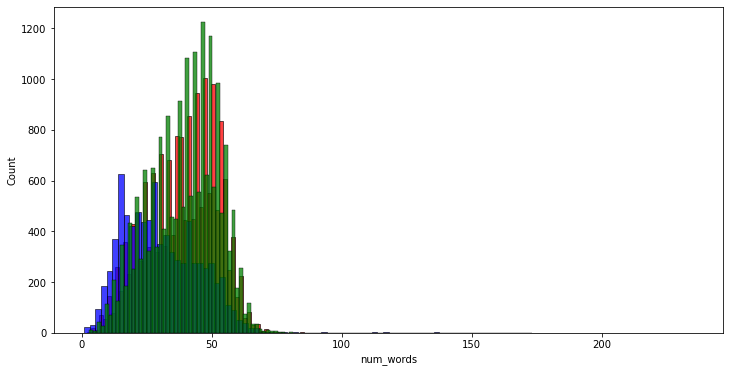

In [32]:
#Visualization of no. of words in different type of tweets.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(covid2[covid2['target'] == 0]['num_words'],color='red')
sns.histplot(covid2[covid2['target'] == 1]['num_words'],color='blue')
sns.histplot(covid2[covid2['target'] == 2]['num_words'],color='green')

<AxesSubplot:>

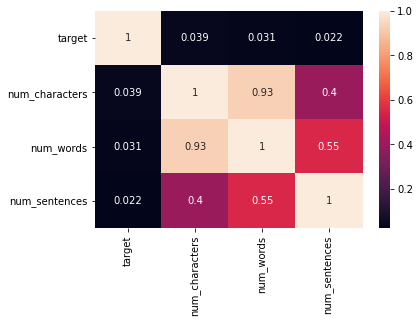

In [33]:
#Correlation of no. of words, characters and sentences with Target variable
sns.heatmap(covid2.corr(), annot=True)

# Data Preprocessing
#1.Lower case
#2.Tokenization
#3.Removing special characters
#4.Removing stop words and punctuation
#5.Stemming

In [34]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
import string as str
str.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [37]:
ps.stem('loving')

'love'

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in str.punctuation:
            y.append(i)        
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [39]:
#Tween no. 11 before text transformation
(covid2['text'][10])

'Best quality couches at unbelievably low prices available to order.We are in Boksburg GP For more info WhatsApp:084 764 8086#SuperTuesdsy #PowerTalk #Covid_19 #SayEntrepreneur #DJSBU https://t.co/HhDJhyQ2Dc'

In [40]:
##Tween no. 11 after text transformation
transform_text(covid2['text'][10])

'best qualiti couch unbeliev low price avail boksburg gp info 764 8086 supertuesdsi powertalk sayentrepreneur djsbu http'

In [41]:
#Created a new column in our database for transformed text
covid2['transformed_text'] = covid2['text'].apply(transform_text)

In [42]:
covid2.head()

text  target  num_characters  \
0  TRENDING: New Yorkers encounter empty supermar...       0             228   
1  When I couldn't find hand sanitizer at Fred Me...       2             193   
2  Find out how you can protect yourself and love...       2              73   
3  #Panic buying hits #NewYork City as anxious sh...       0             318   
4  #toiletpaper #dunnypaper #coronavirus #coronav...       1             252   

   num_words  num_sentences                                   transformed_text  
0         36              1  trend new yorker encount empti supermarket she...  
1         44              4  could find hand sanit fred meyer turn amazon 2...  
2         15              2                   find protect love one coronaviru  
3         57              2  panic buy hit newyork citi anxiou shopper stoc...  
4         40              2  toiletpap dunnypap coronaviru coronavirusaustr...

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=1600,height=680,min_font_size=3,background_color='white')

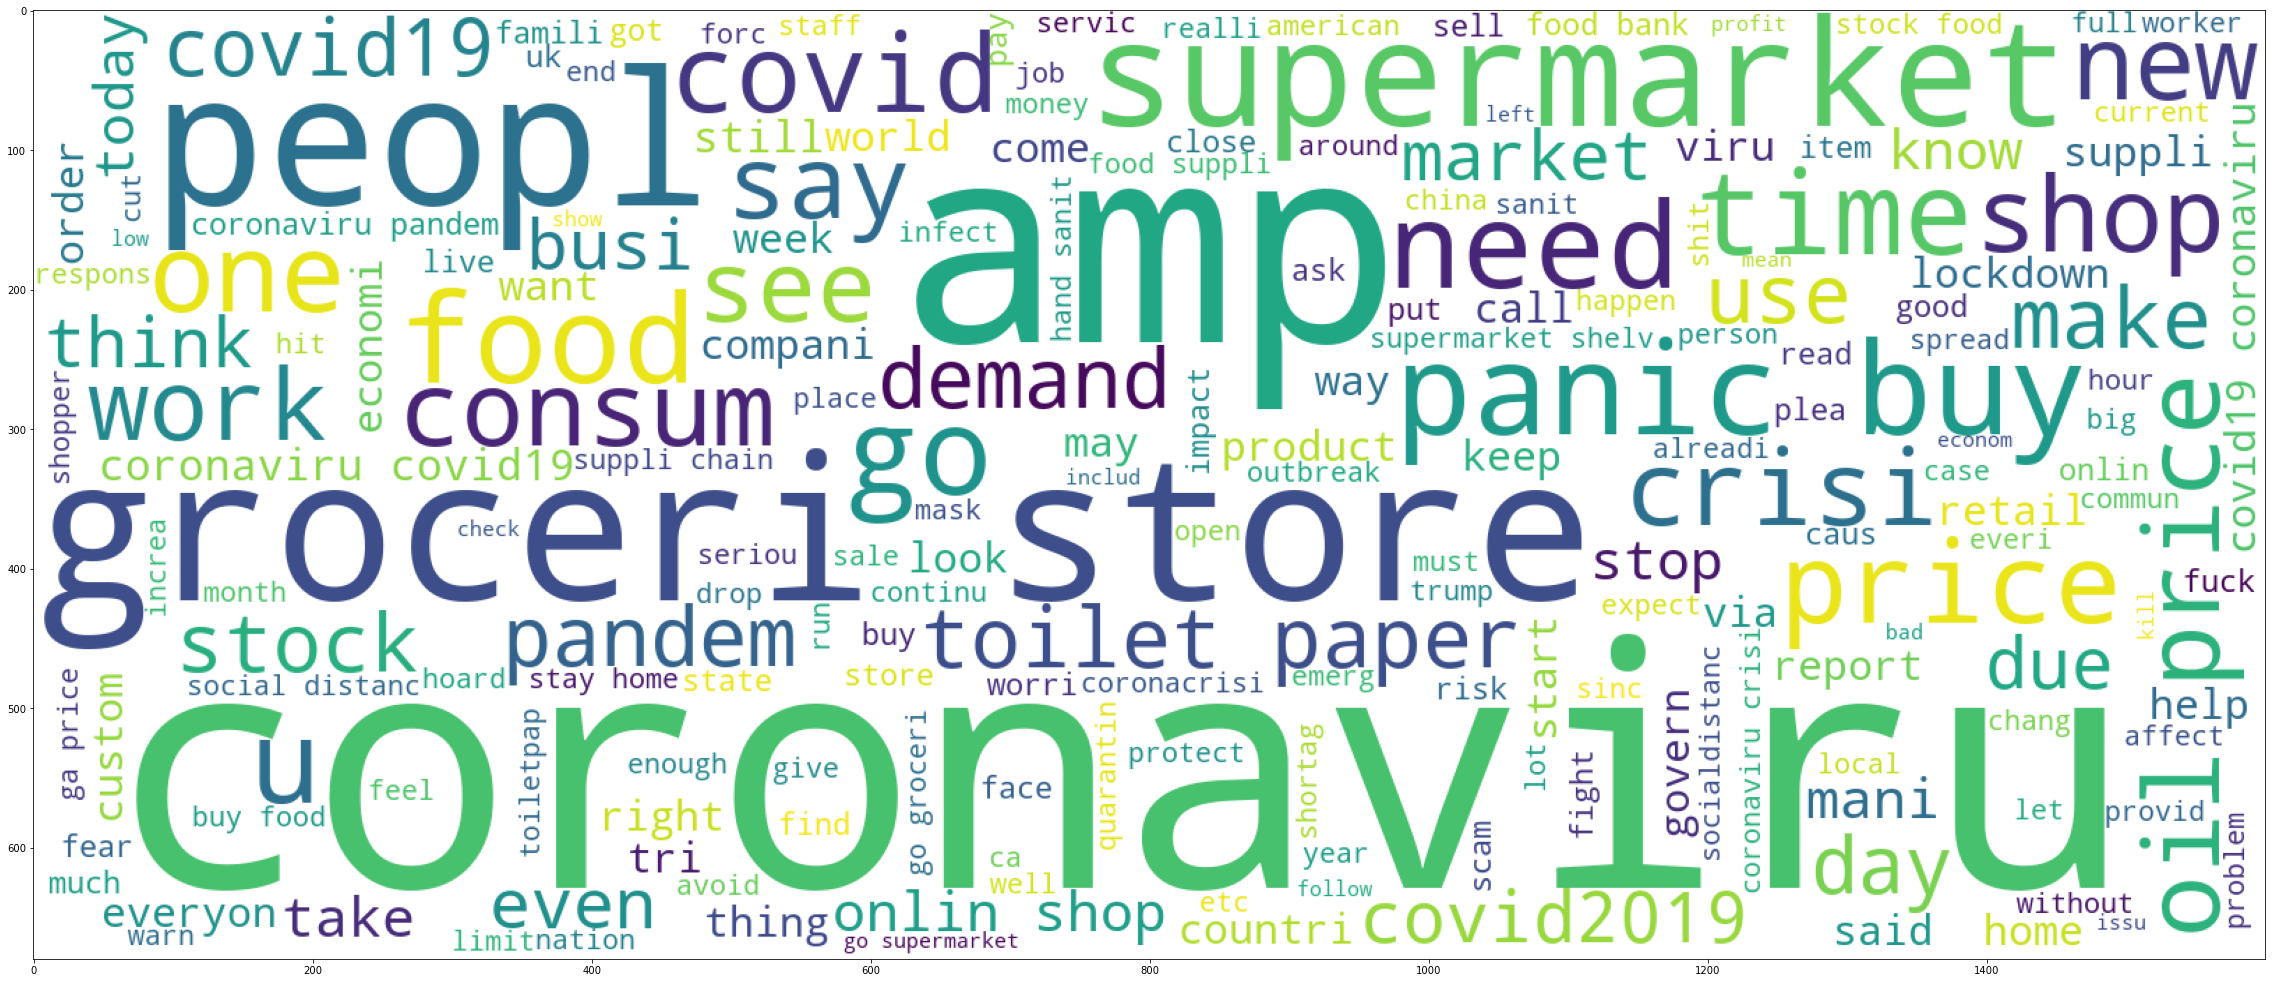

In [44]:
#Wordcloud of negative tweets
negative_wc = wc.generate(covid2[covid2['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(40,40))
plt.imshow(negative_wc)

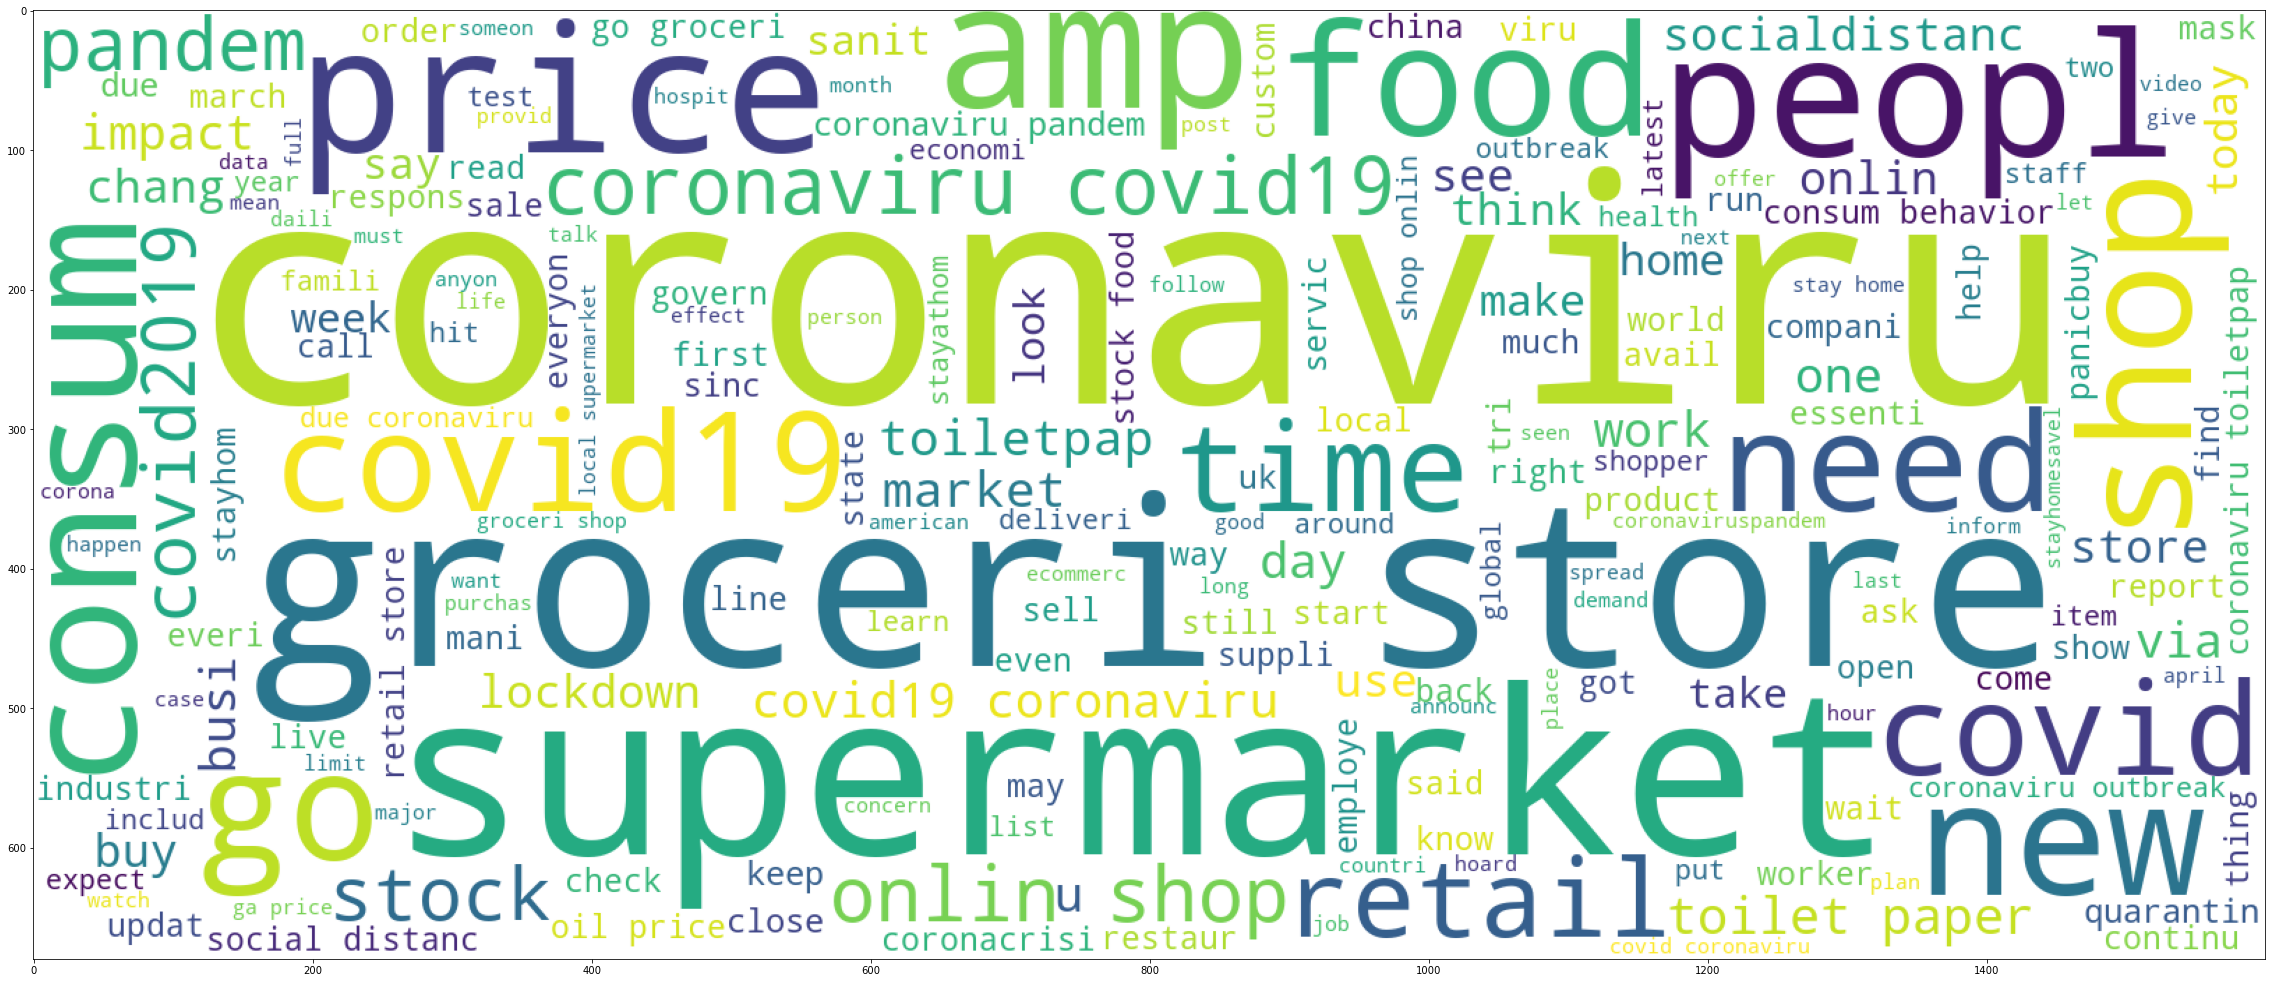

In [45]:
#Wordcloud of neutral tweets
neutral_wc = wc.generate(covid2[covid2['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(40,40))
plt.imshow(neutral_wc)

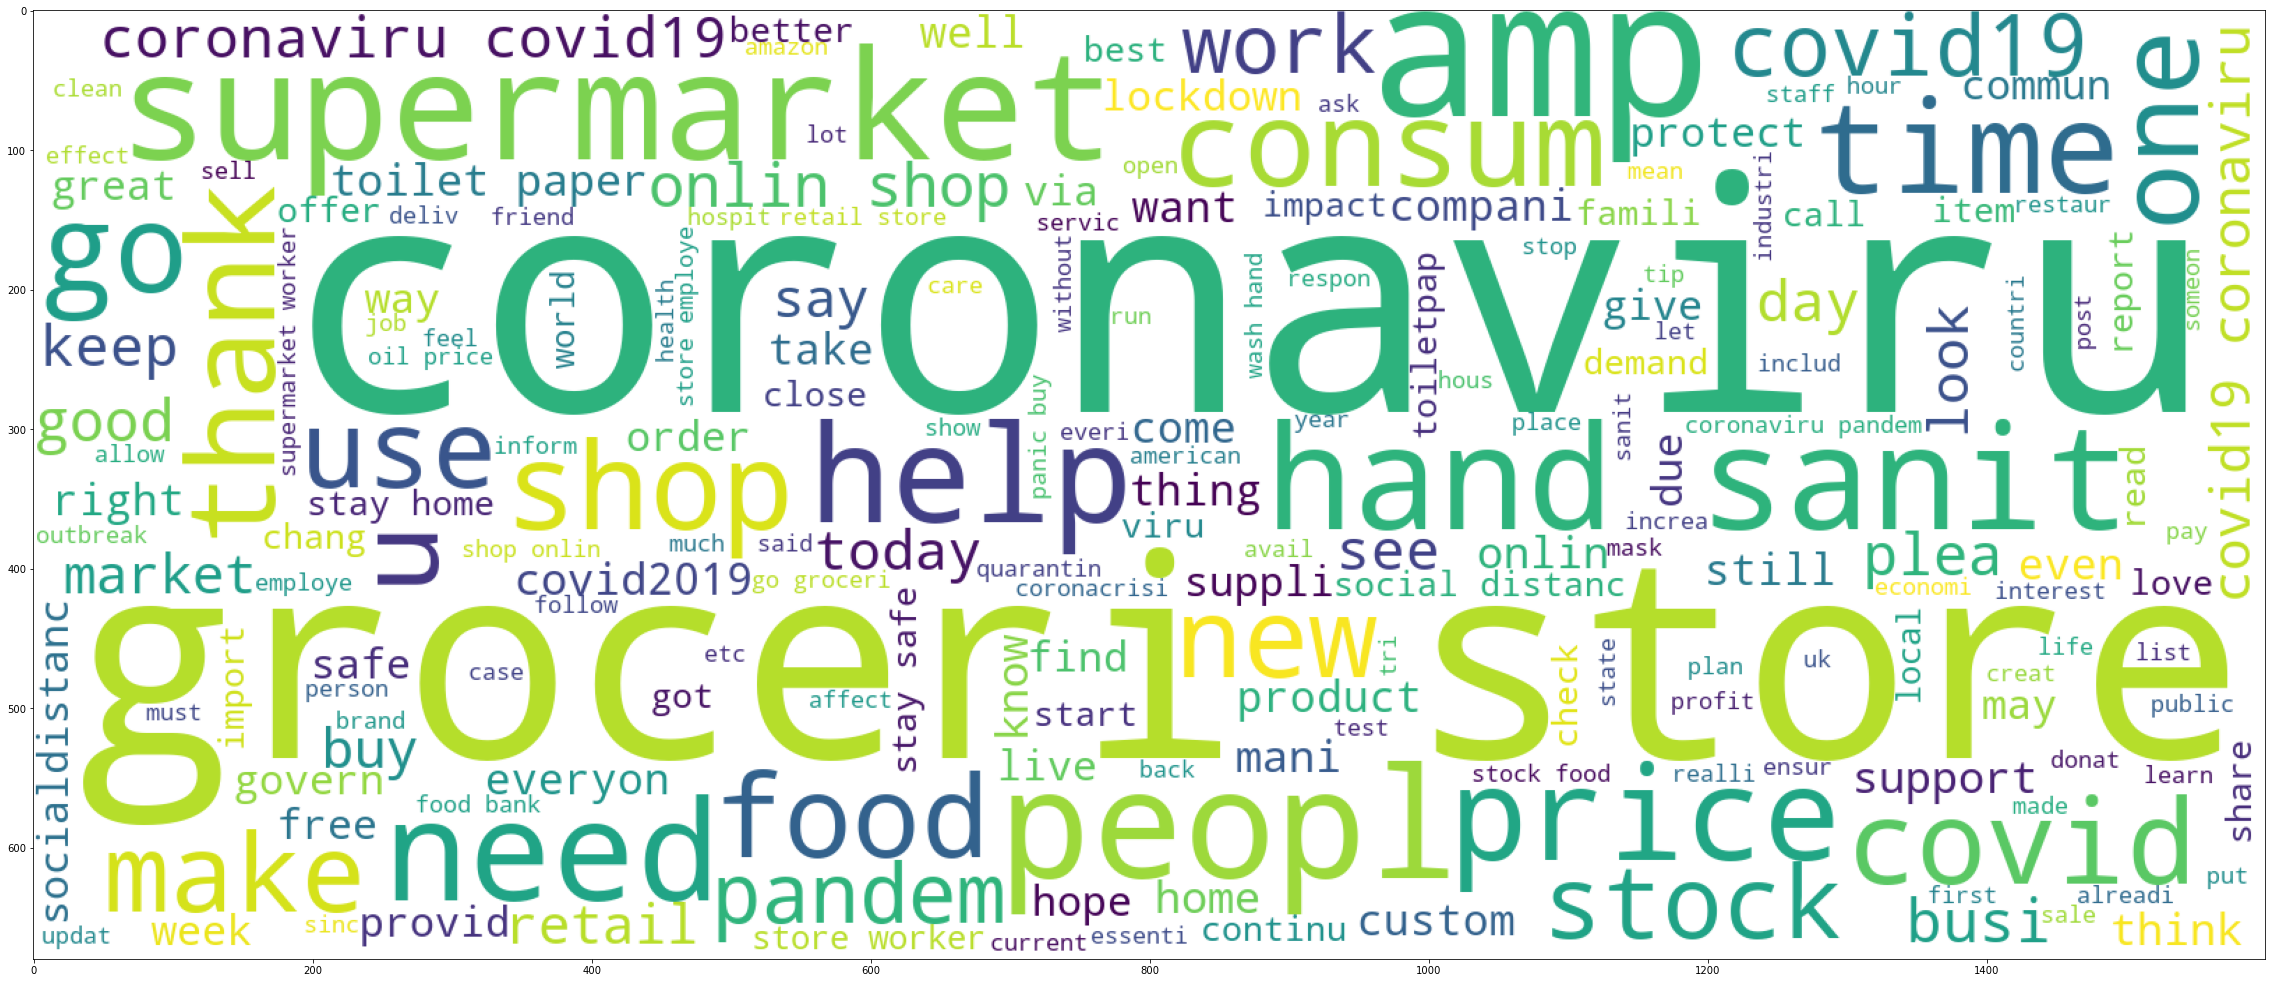

In [46]:
#Wordcloud of positve tweets
positive_wc = wc.generate(covid2[covid2['target'] == 2]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(40,40))
plt.imshow(positive_wc)

In [47]:
#Count of words in negative tweets
negative_corpus = []
for msg in covid2[covid2['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        negative_corpus.append(word)

In [48]:
len(negative_corpus)

323009

In [49]:
#Top 100 words in negative tweets
from collections import Counter
Counter(negative_corpus).most_common(100)

[('http', 8656),
 ('coronaviru', 7372),
 ('price', 4582),
 ('food', 4329),
 ('supermarket', 3256),
 ('store', 3176),
 ('peopl', 3087),
 ('groceri', 2599),
 ('panic', 2308),
 ('amp', 2274),
 ('buy', 2115),
 ('go', 2028),
 ('shop', 1896),
 ('19', 1819),
 ('consum', 1800),
 ('get', 1698),
 ('covid', 1691),
 ('covid19', 1665),
 ('need', 1552),
 ('demand', 1400),
 ('crisi', 1373),
 ('stock', 1350),
 ('time', 1296),
 ('pandem', 1255),
 ('work', 1213),
 ('oil', 1171),
 ('onlin', 1107),
 ('suppli', 1103),
 ('worker', 1018),
 ('stop', 1001),
 ('us', 978),
 ('due', 928),
 ('one', 926),
 ('home', 889),
 ('like', 881),
 ('shelv', 833),
 ('take', 830),
 ('day', 807),
 ('toilet', 797),
 ('make', 796),
 ('week', 787),
 ('market', 761),
 ('say', 751),
 ('paper', 748),
 ('see', 727),
 ('covid2019', 712),
 ('retail', 687),
 ('product', 667),
 ('new', 635),
 ('empti', 628),
 ('use', 623),
 ('busi', 614),
 ('mask', 610),
 ('mani', 609),
 ('even', 599),
 ('think', 584),
 ('sanit', 581),
 ('today', 580),
 (

In [50]:
#Count of words in neutral tweets
neutral_corpus = []
for msg in covid2[covid2['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        neutral_corpus.append(word)

In [51]:
len(neutral_corpus)

119706

In [52]:
#Top 100 words in neutral tweets
Counter(neutral_corpus).most_common(100)

[('http', 5948),
 ('coronaviru', 4089),
 ('store', 1801),
 ('supermarket', 1561),
 ('price', 1418),
 ('groceri', 1413),
 ('covid19', 1192),
 ('consum', 1158),
 ('shop', 1054),
 ('food', 853),
 ('onlin', 765),
 ('covid', 726),
 ('19', 721),
 ('go', 683),
 ('peopl', 681),
 ('amp', 600),
 ('pandem', 586),
 ('toiletpap', 566),
 ('get', 526),
 ('retail', 508),
 ('stock', 504),
 ('need', 495),
 ('time', 425),
 ('work', 399),
 ('new', 383),
 ('home', 381),
 ('toilet', 374),
 ('via', 363),
 ('impact', 362),
 ('market', 358),
 ('paper', 357),
 ('covid2019', 334),
 ('mask', 330),
 ('buy', 327),
 ('day', 319),
 ('due', 314),
 ('busi', 301),
 ('close', 292),
 ('chang', 291),
 ('week', 284),
 ('one', 283),
 ('sanit', 273),
 ('local', 271),
 ('us', 269),
 ('lockdown', 265),
 ('today', 256),
 ('worker', 253),
 ('outbreak', 242),
 ('see', 241),
 ('socialdistanc', 241),
 ('suppli', 233),
 ('use', 223),
 ('take', 223),
 ('make', 221),
 ('essenti', 221),
 ('quarantin', 216),
 ('spread', 213),
 ('say', 21

In [53]:
#Count of words in positive tweets
positive_corpus = []
for msg in covid2[covid2['target'] == 2]['transformed_text'].tolist():
    for word in msg.split():
        positive_corpus.append(word)

In [54]:
len(positive_corpus)

378462

In [55]:
#Top 100 words in positive tweets
Counter(positive_corpus).most_common(100)

[('http', 11206),
 ('coronaviru', 8102),
 ('store', 4420),
 ('groceri', 3611),
 ('price', 3532),
 ('supermarket', 3514),
 ('food', 3400),
 ('amp', 2934),
 ('shop', 2830),
 ('peopl', 2582),
 ('consum', 2442),
 ('covid19', 2383),
 ('hand', 2296),
 ('help', 2280),
 ('sanit', 2159),
 ('19', 2077),
 ('onlin', 2051),
 ('like', 2038),
 ('go', 2011),
 ('need', 1948),
 ('covid', 1911),
 ('get', 1900),
 ('time', 1713),
 ('worker', 1703),
 ('work', 1679),
 ('stock', 1620),
 ('pandem', 1481),
 ('pleas', 1405),
 ('thank', 1367),
 ('home', 1346),
 ('us', 1344),
 ('make', 1291),
 ('stay', 1179),
 ('buy', 1145),
 ('keep', 1138),
 ('retail', 1083),
 ('good', 1078),
 ('one', 1051),
 ('use', 1040),
 ('demand', 1039),
 ('busi', 1021),
 ('mask', 992),
 ('take', 988),
 ('safe', 966),
 ('day', 949),
 ('local', 947),
 ('suppli', 919),
 ('see', 877),
 ('increas', 876),
 ('deliveri', 843),
 ('support', 842),
 ('covid2019', 807),
 ('new', 798),
 ('market', 796),
 ('due', 787),
 ('week', 783),
 ('today', 778),
 (

# Model Building

In [56]:
#Importing libraries and limiting the max features to 3000 due to memory issues.
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
cv = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

In [57]:
#Defining X for our model
X = tfidf.fit_transform(covid2['transformed_text']).toarray()

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [58]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
X.shape

(44955, 3000)

In [60]:
#Defining y for our model
y=covid2['target'].values

In [61]:
y

array([0, 2, 2, ..., 2, 1, 0])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
#Spliting the data to training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [64]:
#Importing and trying three different Naive Bayes Models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test, y_pred1,average='macro'))

0.4929373818262707
[[1550 1485  379]
 [ 157 1365  133]
 [ 559 1846 1517]]
0.5741188571872405


In [67]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test, y_pred2,average='macro'))

0.6664442219997776
[[2437   78  899]
 [ 460  318  877]
 [ 619   66 3237]]
0.6757166639995177


In [68]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test, y_pred3,average='macro'))

0.6881325770214659
[[2300  502  612]
 [ 219 1151  285]
 [ 695  491 2736]]
0.668520931813922


In [69]:
import pickle

In [70]:
pickle.dump(bnb, open('bnbmodel.pkl','wb'))

In [71]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))